In [ ]:
# !pip install -U control

In [ ]:
# import numpy.random as np
import matplotlib.pyplot as plt
# import control as co
from sympy import *
from sympy.physics.control.lti import *
from sympy.physics.control import *

In [ ]:
plt.rcParams['figure.figsize'] = [23, 10]
plt.rcParams['font.size'] = 24

In [ ]:
m1, m2, b2, b3, K2, g = symbols('m1, m2, b2, b3, K2, g')
s, t = symbols('s, t')


In [ ]:
y_1, y_2, X = symbols('y_1, y_2, X')
eq1 = m1*s**2*y_1 + b3*s*(y_1 - y_2)
eq2 = m2*s**2*y_2 - b3*s*(y_1 - y_2) + K2*(y_2 - X) + b2*s*(y_2 - X)

solv = linsolve((eq1,eq2),y_1,y_2)

In [ ]:
solv.args[0]

((K2*X*b3 + X*b2*b3*s)/(K2*b3 + K2*m1*s + b2*b3*s + b2*m1*s**2 + b3*m1*s**2 + b3*m2*s**2 + m1*m2*s**3), (K2*X*b3 + K2*X*m1*s + X*b2*b3*s + X*b2*m1*s**2)/(K2*b3 + K2*m1*s + b2*b3*s + b2*m1*s**2 + b3*m1*s**2 + b3*m2*s**2 + m1*m2*s**3))

In [ ]:
# (K2*X + X*b2*s)/(K2*b3*s + K2*m1*s**2 + K2*m2*s**2 + b2*b3*s**2 + b2*m1*s**3 + b2*m2*s**3 + b3*m1*s**3 + m1*m2*s**4)

In [ ]:
# (K2*X + X*b2*s + X*m1*s**2)/(K2*b3*s + K2*m1*s**2 + K2*m2*s**2 + b2*b3*s**2 + b2*m1*s**3 + b2*m2*s**3 + b3*m1*s**3 + m1*m2*s**4)

In [ ]:
# Y1_X = (K2*b3 - b2*b3*s)/(K2*b3 + K2*m1*s - b2*b3*s - b2*m1*s**2 + b3*m1*s**2 + b3*m2*s**2 + m1*m2*s**3)

In [ ]:
# Y2_X = (K2*b3 + K2*m1*s - b2*b3*s - b2*m1*s**2)/(K2*b3 + K2*m1*s - b2*b3*s - b2*m1*s**2 + b3*m1*s**2 + b3*m2*s**2 + m1*m2*s**3)

In [ ]:
Y1_X, Y2_X = simplify(solv.args[0][0]/X) , simplify(solv.args[0][1]/X)

In [ ]:
Y1_X

b3*(K2 + b2*s)/(K2*b3 + K2*m1*s + b2*b3*s + b2*m1*s**2 + b3*m1*s**2 + b3*m2*s**2 + m1*m2*s**3)

In [ ]:
Y2_X

(K2*b3 + K2*m1*s + b2*b3*s + b2*m1*s**2)/(K2*b3 + K2*m1*s + b2*b3*s + b2*m1*s**2 + b3*m1*s**2 + b3*m2*s**2 + m1*m2*s**3)

In [ ]:
numerY1_X, denomY1_X = fraction(Y1_X)
Y1_X = TransferFunction(numerY1_X, denomY1_X,s)

In [ ]:
numerY2_X, denomY2_X = fraction(Y2_X)
Y2_X = TransferFunction(numerY2_X, denomY2_X,s)

In [ ]:
m_1 = 250
m_2 = 31.2
b_2 = 1666
b_3 = 2000
k_2 = 23510
# k_2 = 100


Y1_X_sub = Y1_X.subs([
    (m1,m_1),
    (m2,m_2),
    (b2,b_2),
    (b3,b_3),
    (K2,k_2)
]).expand().simplify()

Y2_X_sub = Y2_X.subs([
    (m1,m_1),
    (m2,m_2),
    (b2,b_2),
    (b3,b_3),
    (K2,k_2)
]).expand().simplify()

In [ ]:
print(m_1, m_2, b_2, b_3, k_2)

250 31.2 1666 2000 23510


In [ ]:
Y1_X_sub

TransferFunction(3332000.0*s + 47020000.0, 7800.0*s**3 + 978900.0*s**2 + 9209500.0*s + 47020000.0, s)

In [ ]:
Y2_X_sub

TransferFunction(416500.0*s**2 + 9209500.0*s + 47020000.0, 7800.0*s**3 + 978900.0*s**2 + 9209500.0*s + 47020000.0, s)

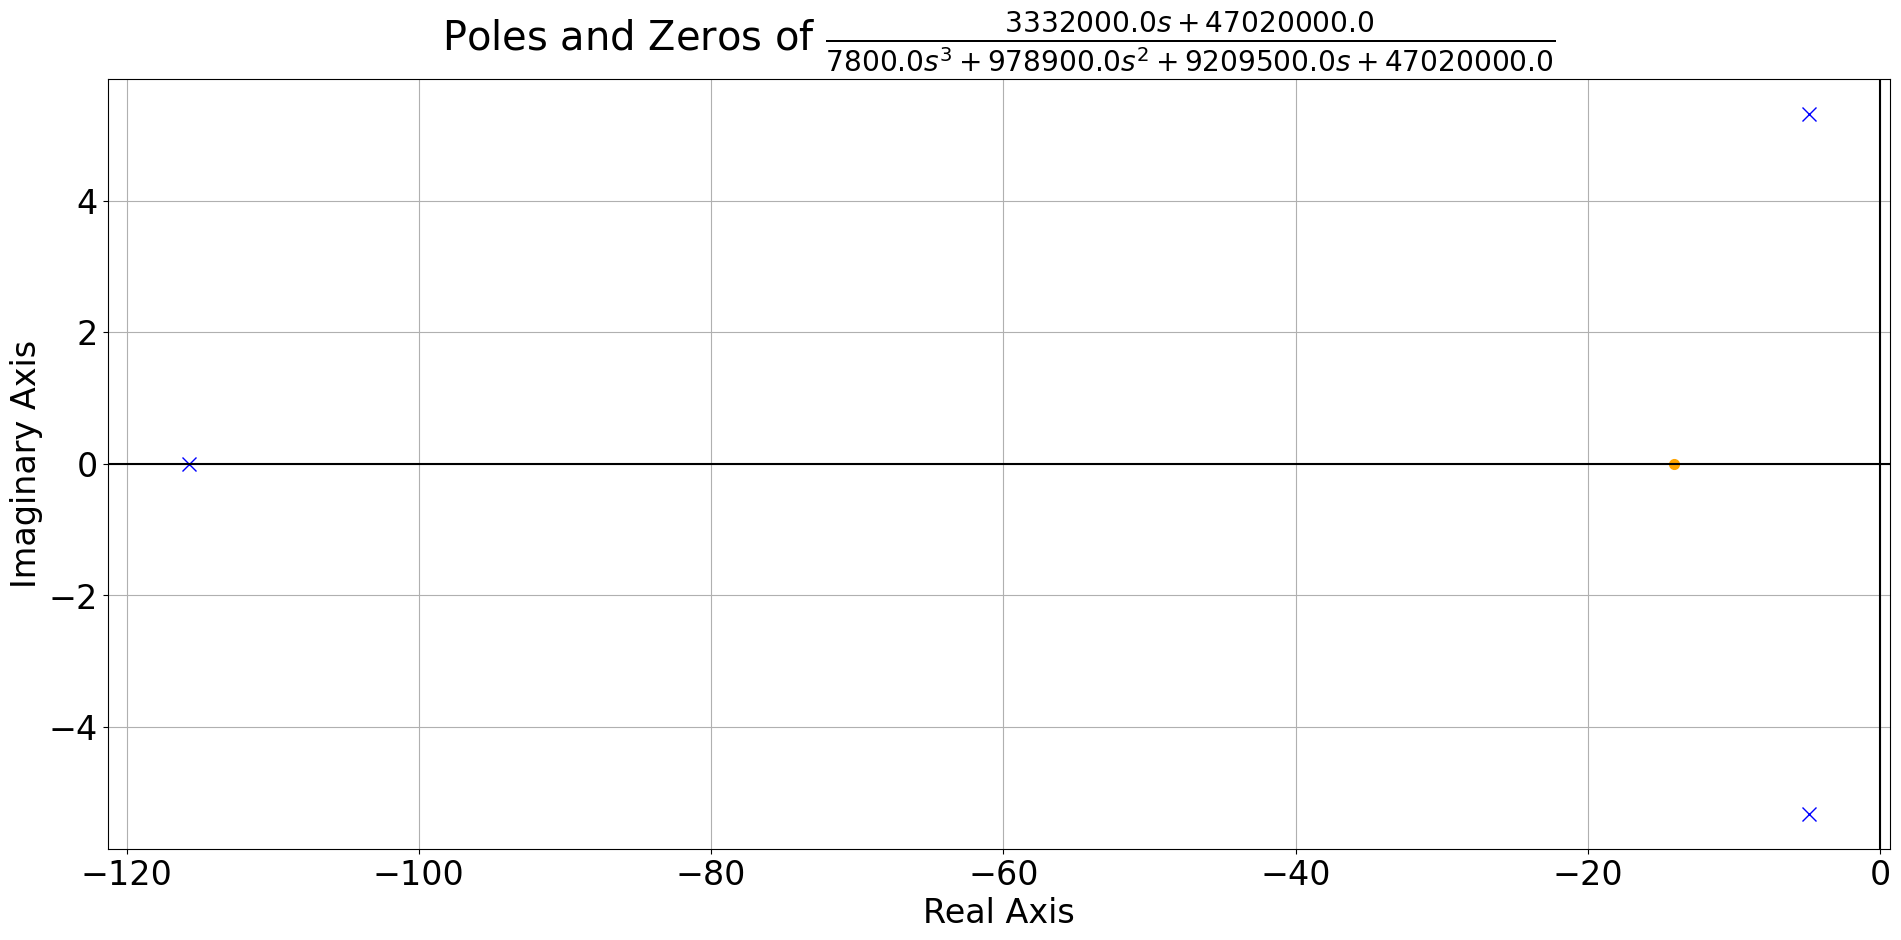

In [ ]:
pole_zero_plot(Y1_X_sub)

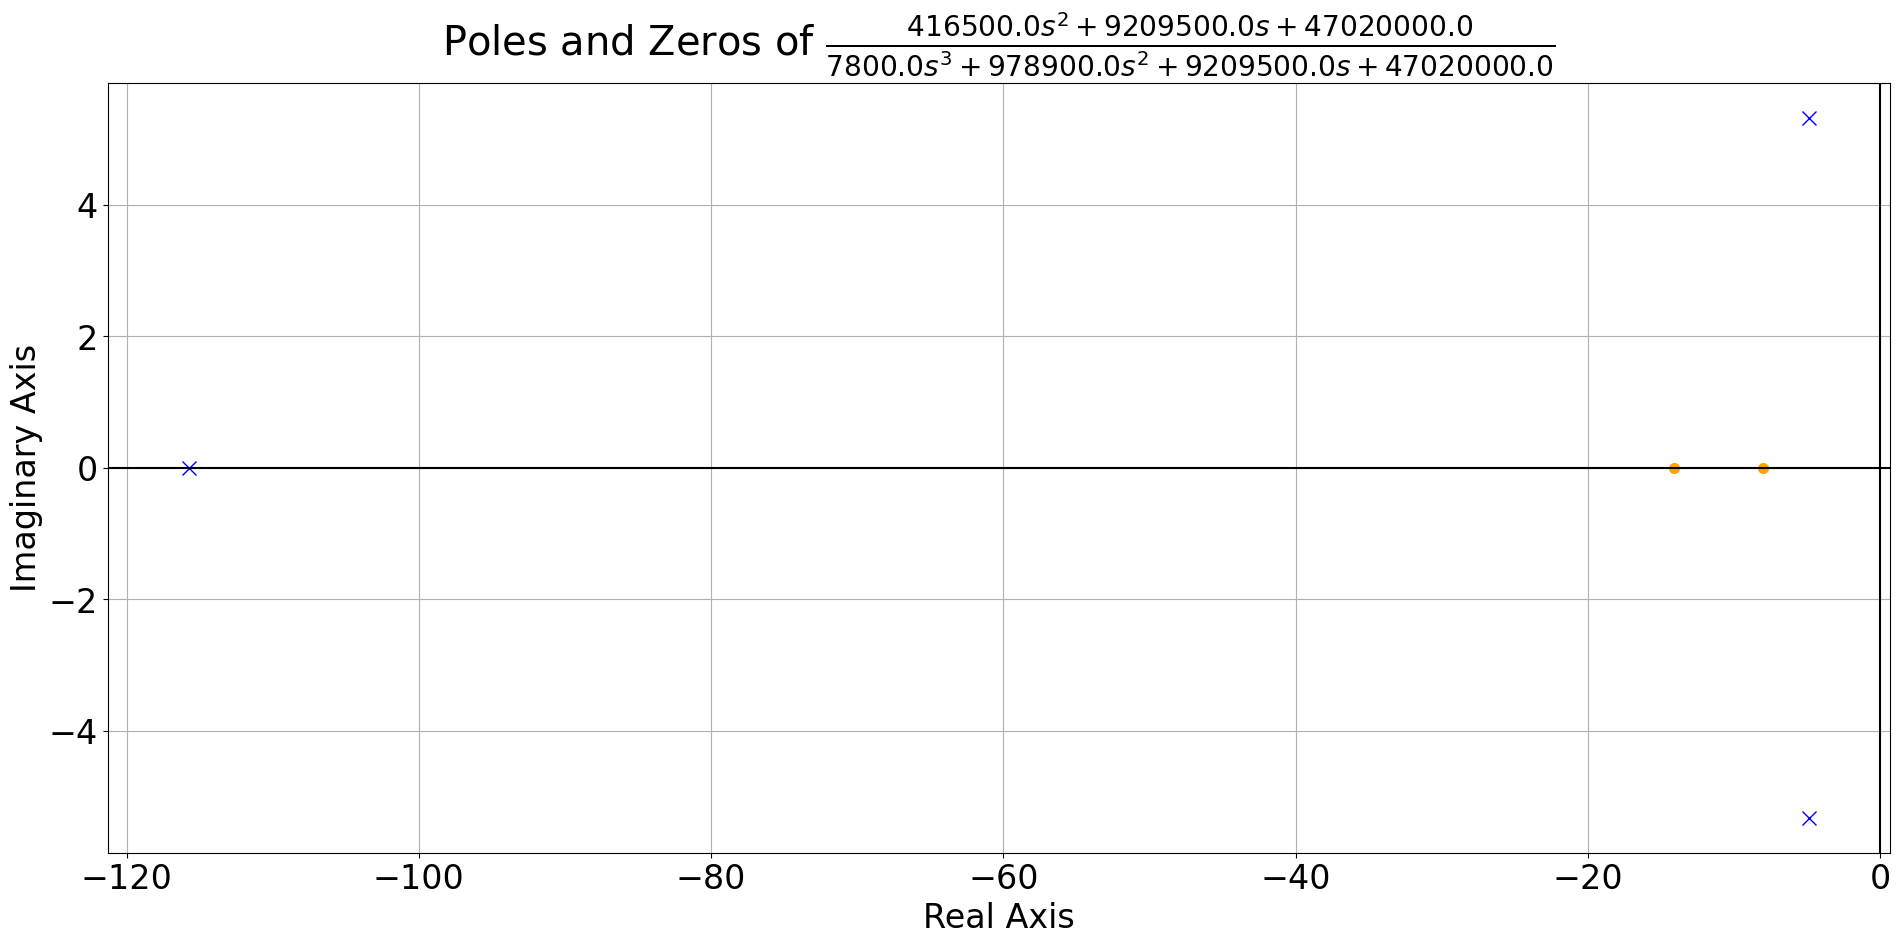

In [ ]:
pole_zero_plot(Y2_X_sub)

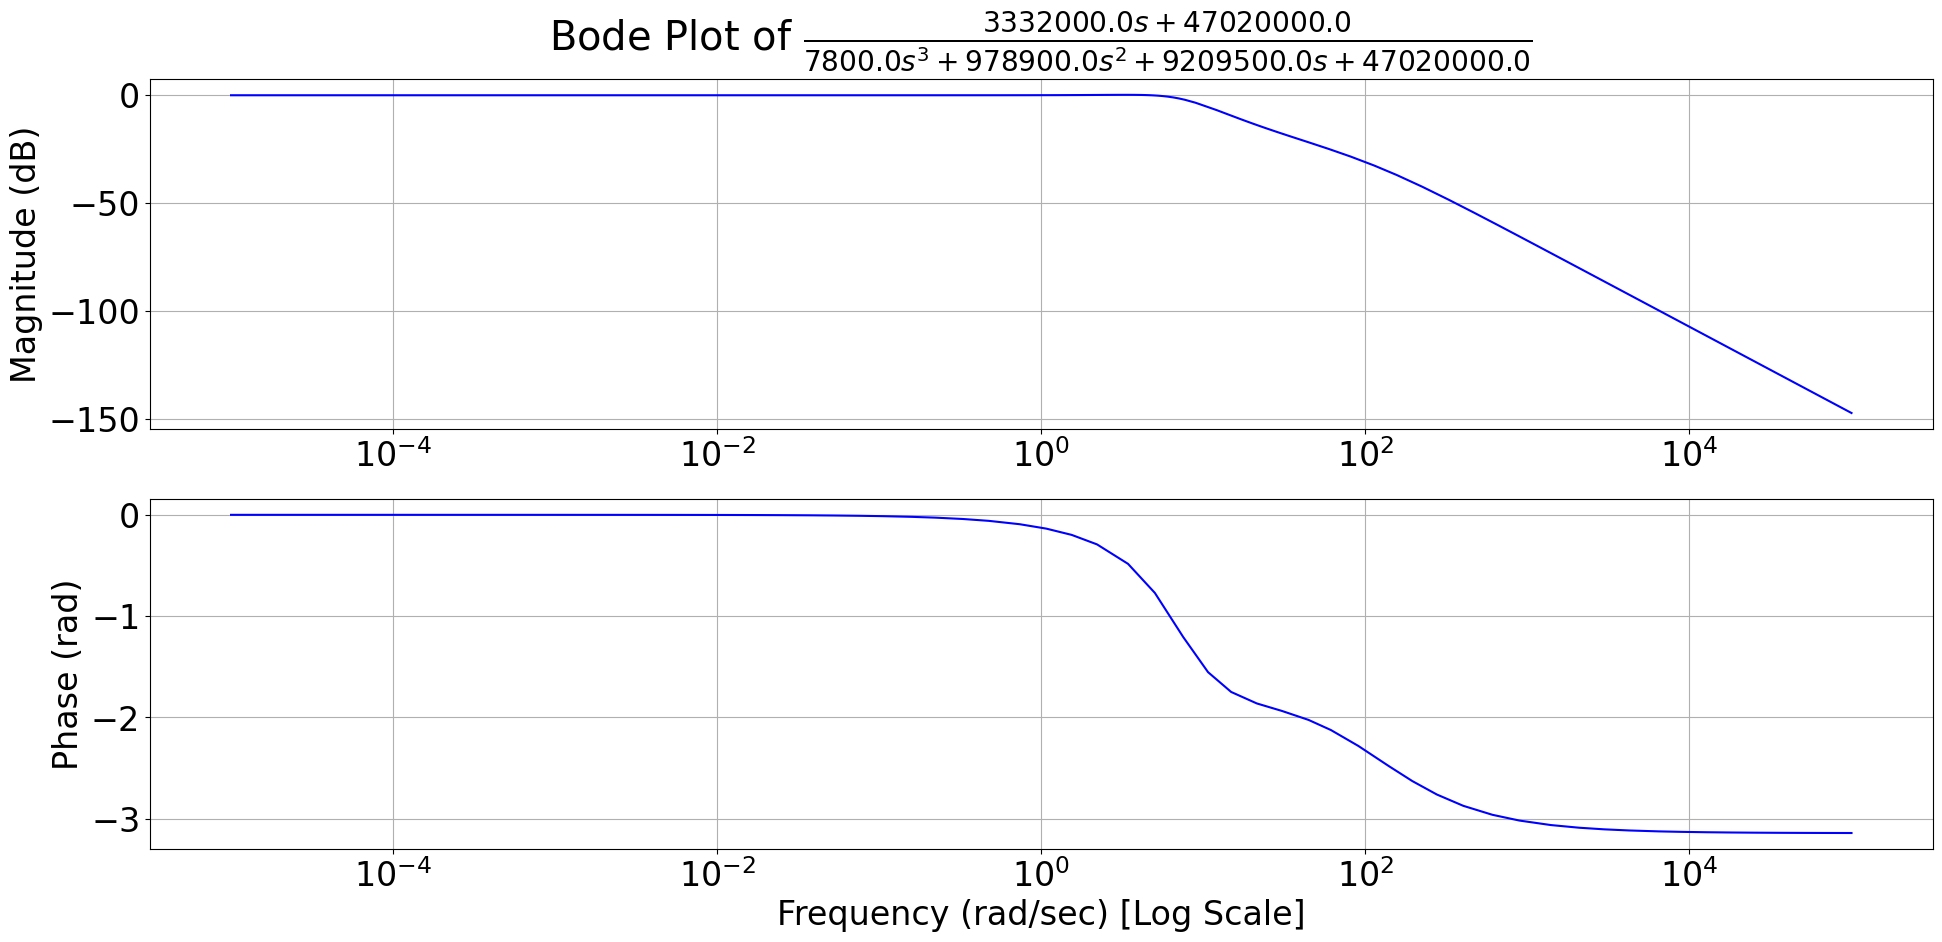

In [ ]:
bode_plot(Y1_X_sub,-5,5)

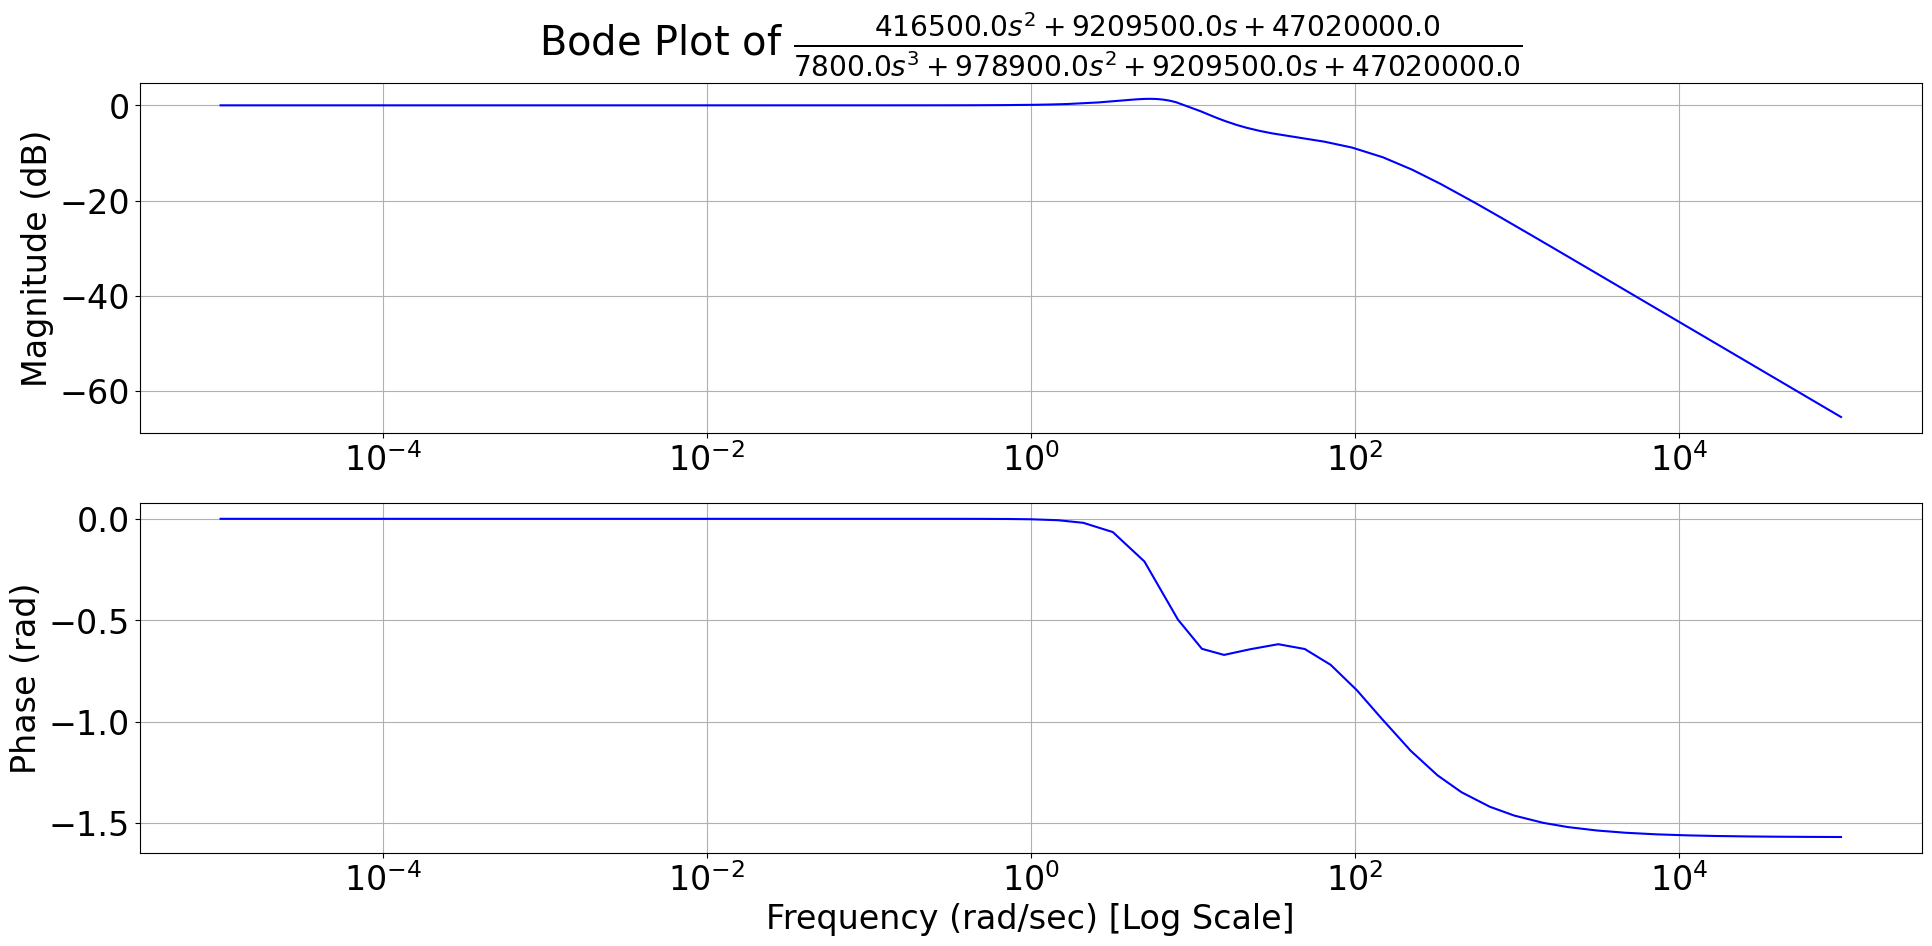

In [ ]:
bode_plot(Y2_X_sub,-5,5)

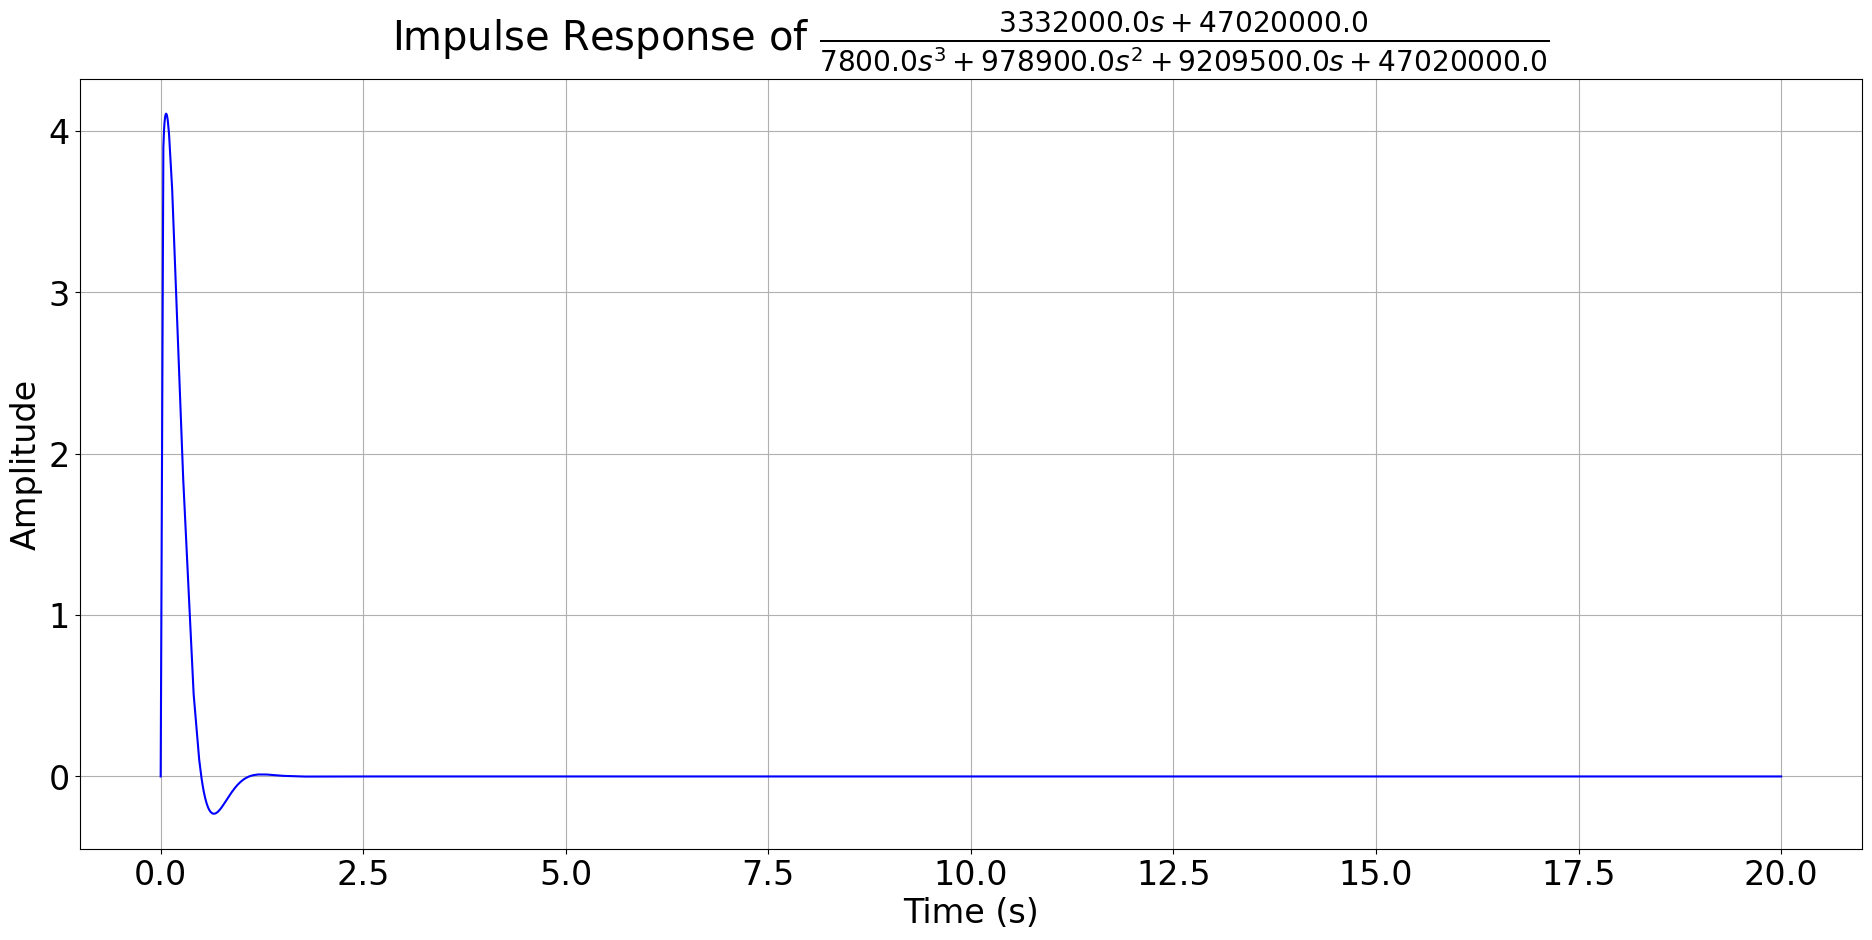

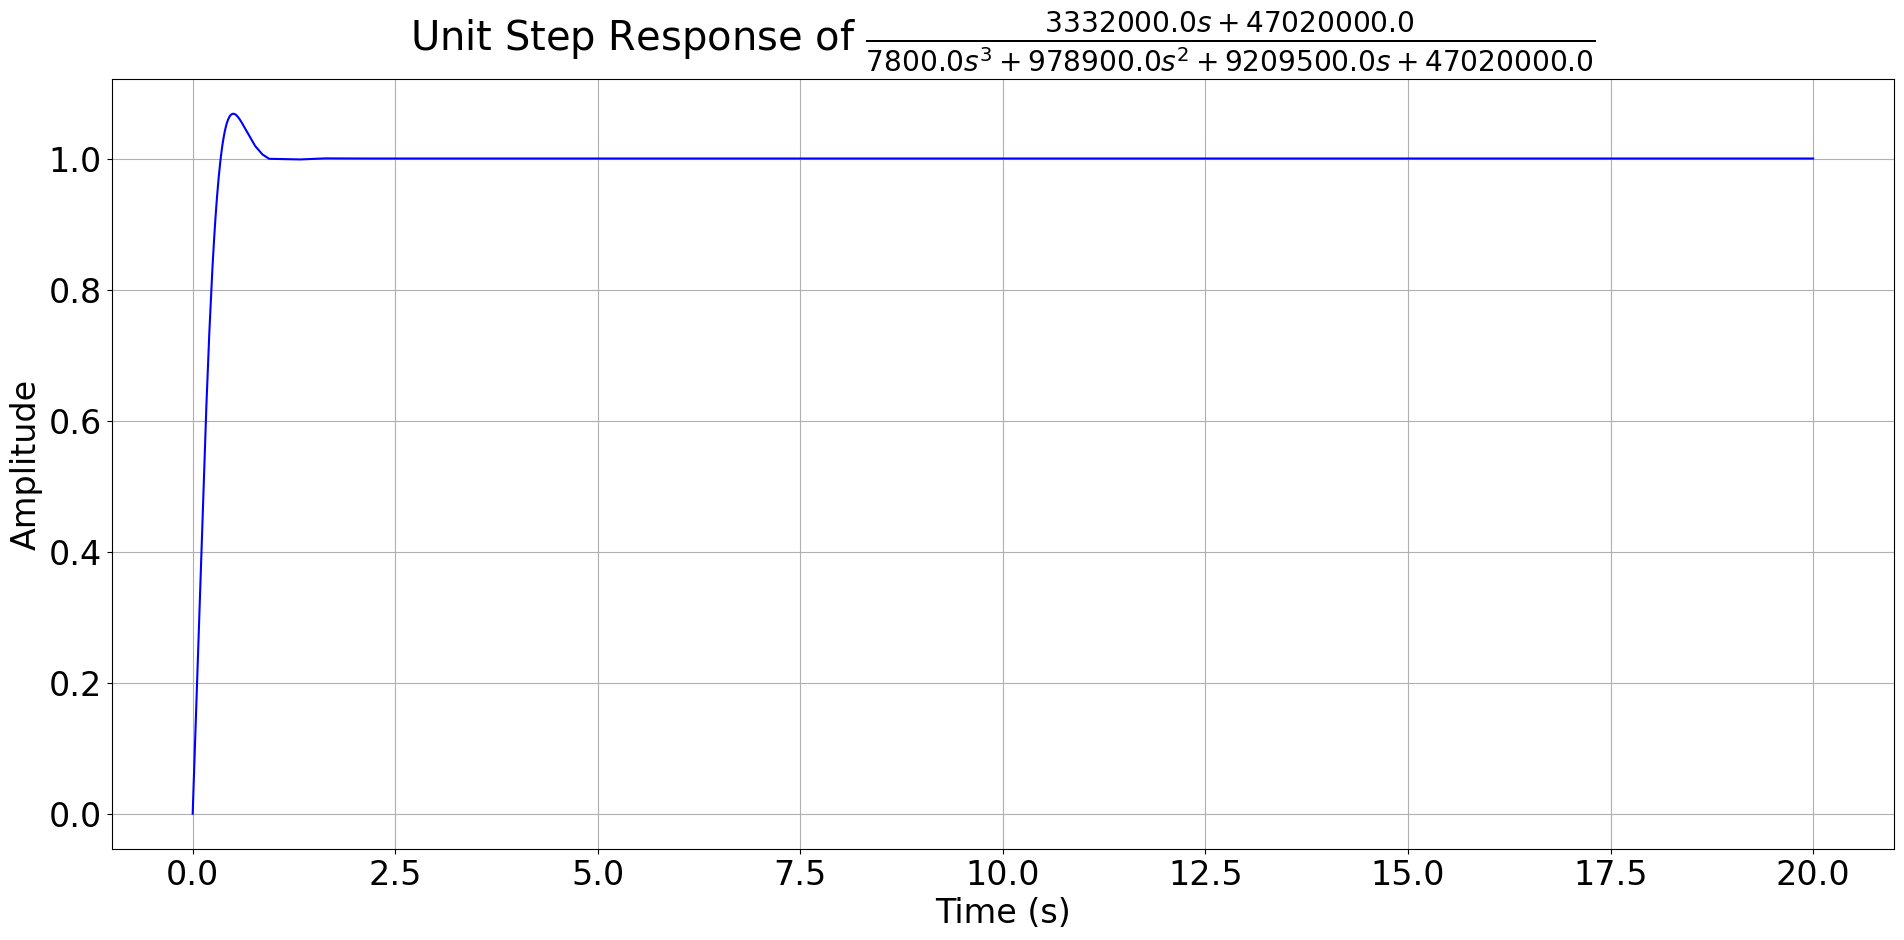

In [ ]:
impulse_response_plot(Y1_X_sub,upper_limit=20)
step_response_plot(Y1_X_sub, upper_limit=20)
# ramp_response_plot(Y1_X_sub)

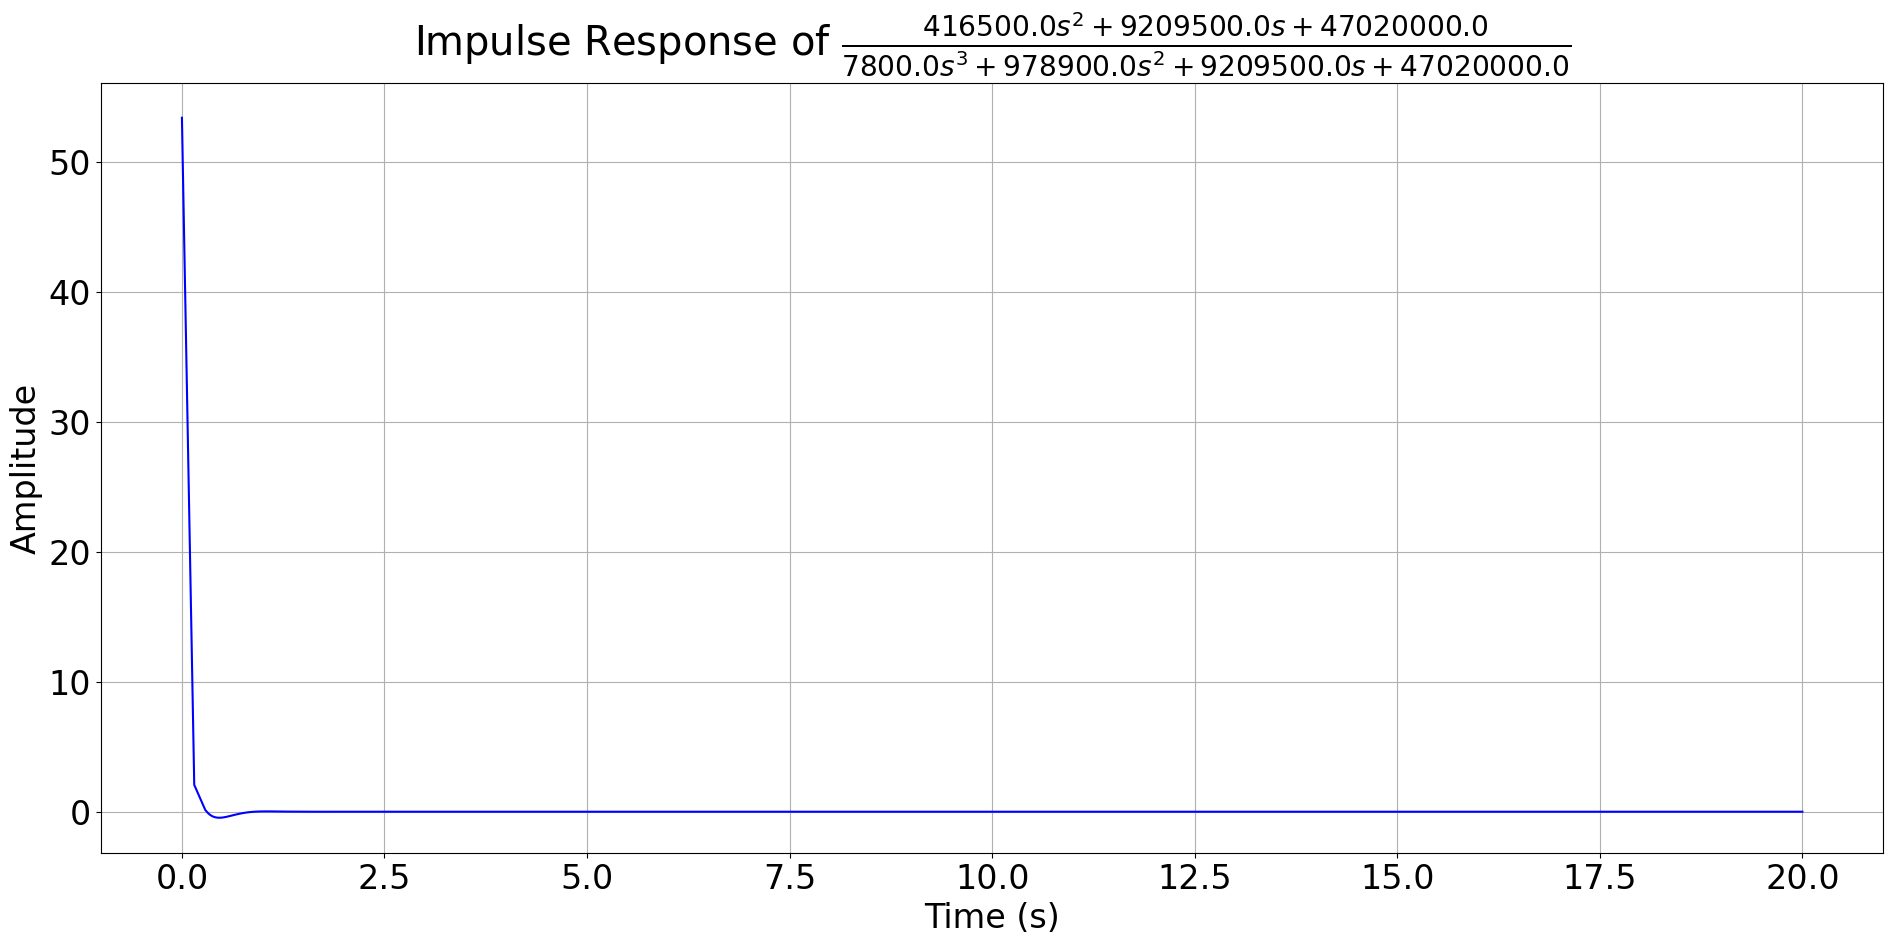

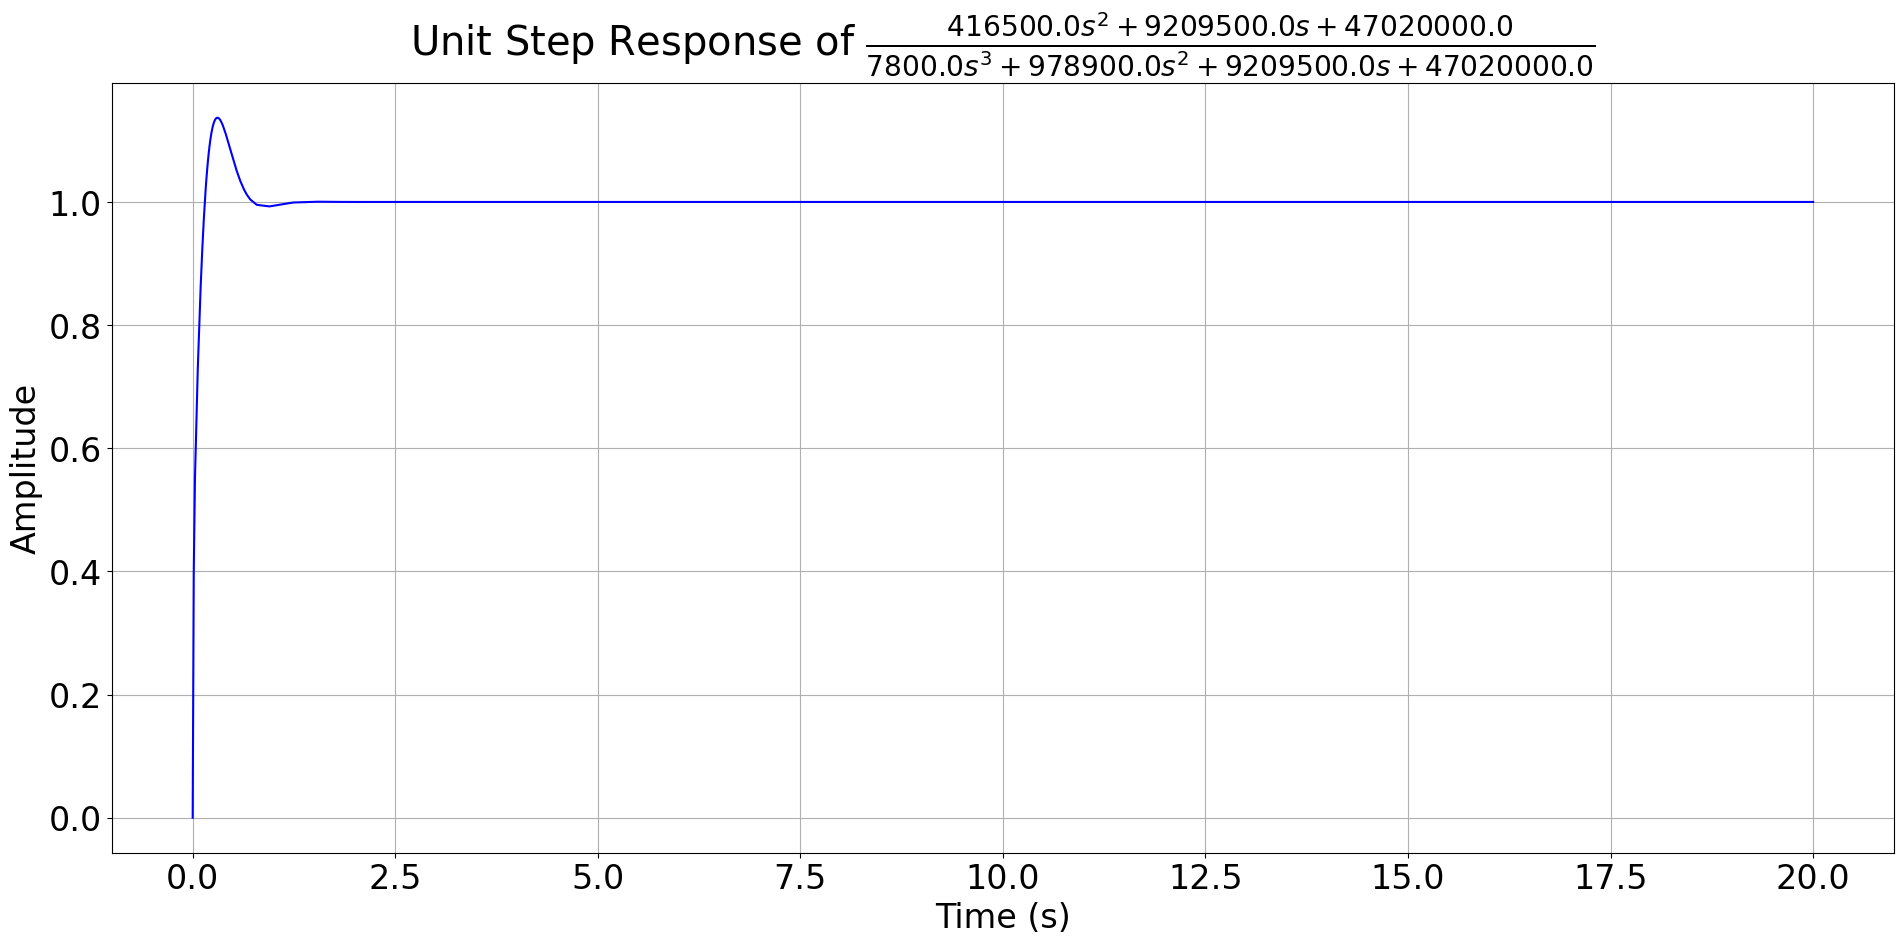

In [ ]:
impulse_response_plot(Y2_X_sub,upper_limit=20)
step_response_plot(Y2_X_sub, upper_limit=20)
# ramp_response_plot(Y2_X_sub, upper_limit=20)

In [ ]:
!pip install -U control
import control as co
import numpy as np

In [ ]:
G1 = co.tf([b_2*b_3, b_3*k_2],[m_1*m_2, b_3*m_2+b_3*m_1+b_2*m_1, k_2*m_1 + b_2*b_3, k_2*b_3])
G2 = co.tf([b_2*m_1,b_2*b_3 + k_2*m_1, k_2*b_3],[m_1*m_2, b_3*m_2+b_3*m_1+b_2*m_1, k_2*m_1 + b_2*b_3, k_2*b_3])

In [ ]:
from scipy import signal



cpr = 50

cpr2 = 200
t2 = []
t3 = []

t = np.linspace(0,10,1000)
u = np.heaviside(t,t)
for idx in range(len(u)):
  if(idx<cpr):
    t2.append(u[idx])
  else:
    t2.append(0)

for idx in range(len(u)):
  if(idx<cpr2):
    t3.append(u[idx])
  else:
    t3.append(0)



Text(0.5, 1.0, 'arbitrary input 1')

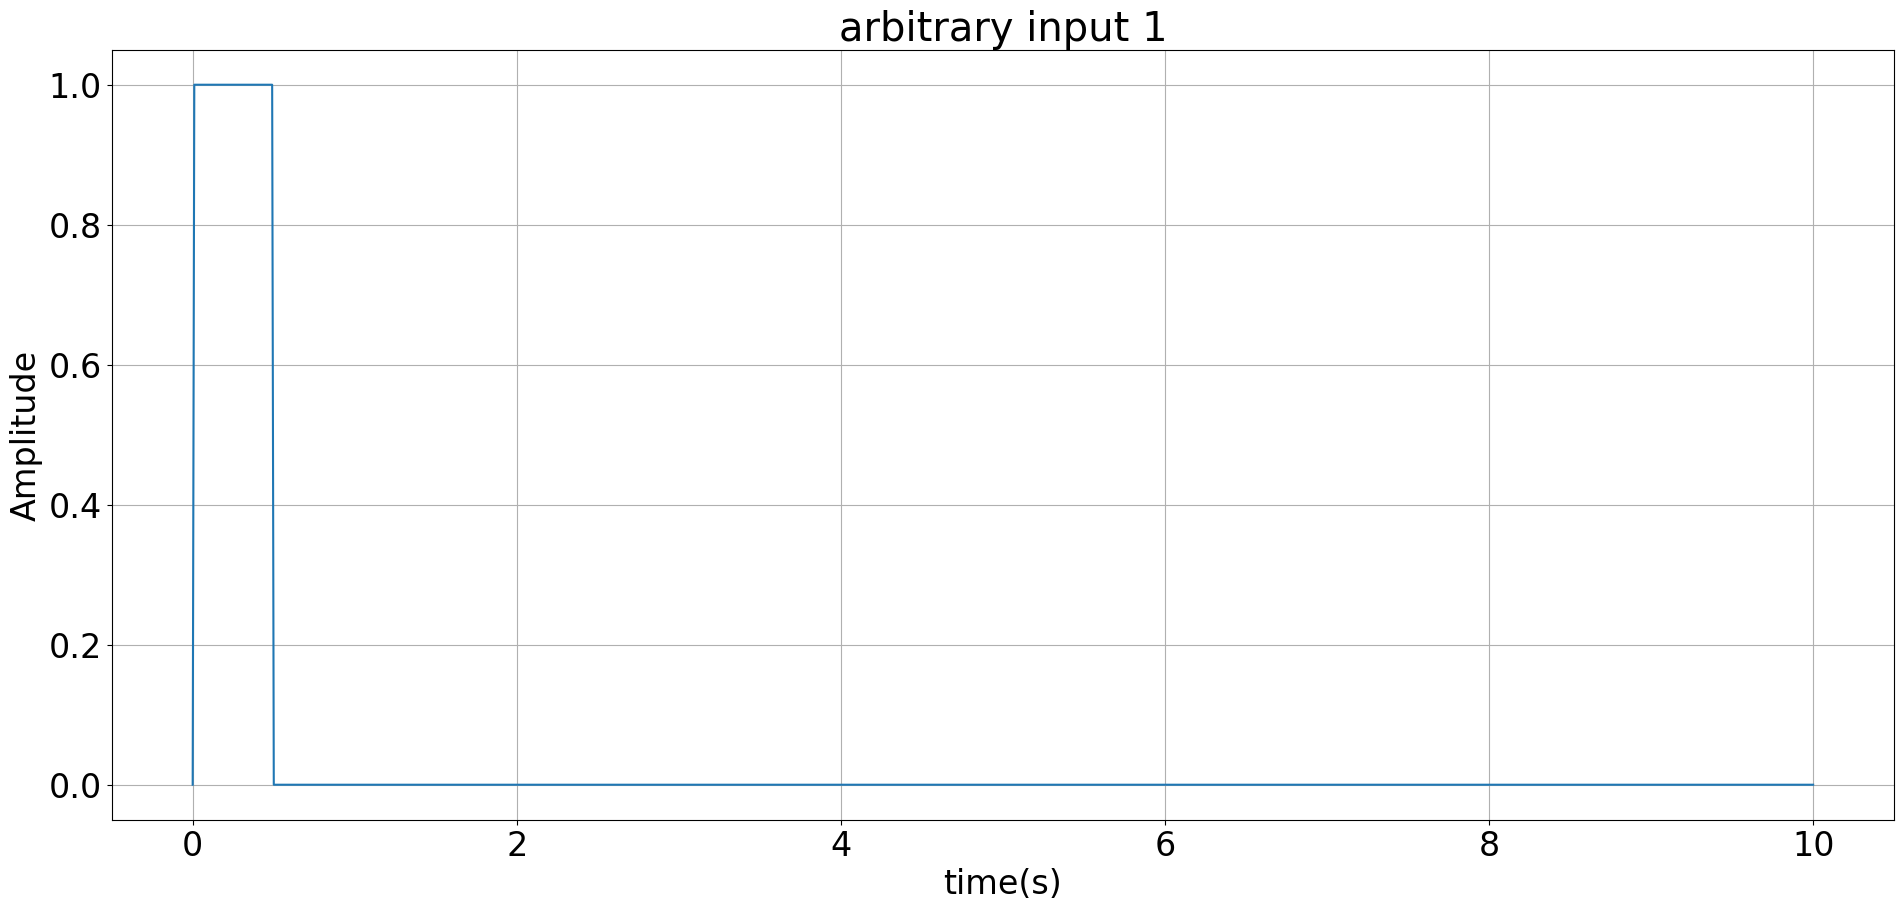

In [ ]:
plt.plot(t,t2)
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('Amplitude')
plt.title('arbitrary input 1')

Text(0.5, 1.0, 'arbitrary input 2')

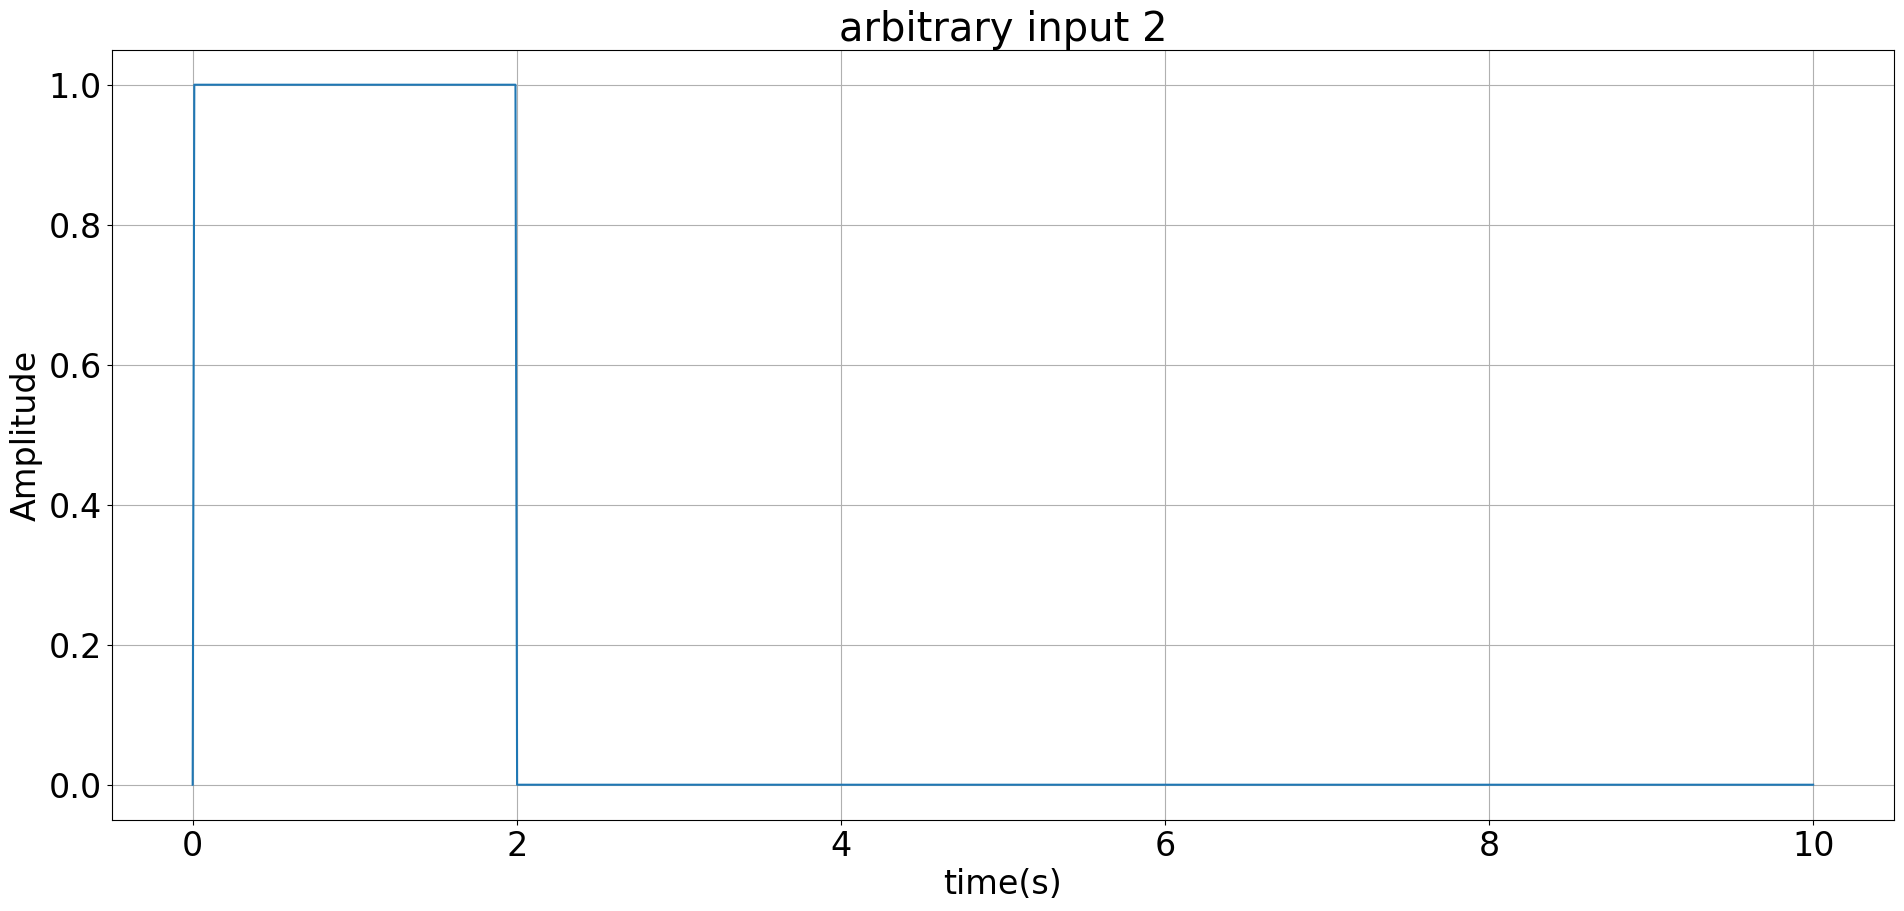

In [ ]:
plt.plot(t,t3)
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('Amplitude')
plt.title('arbitrary input 2')

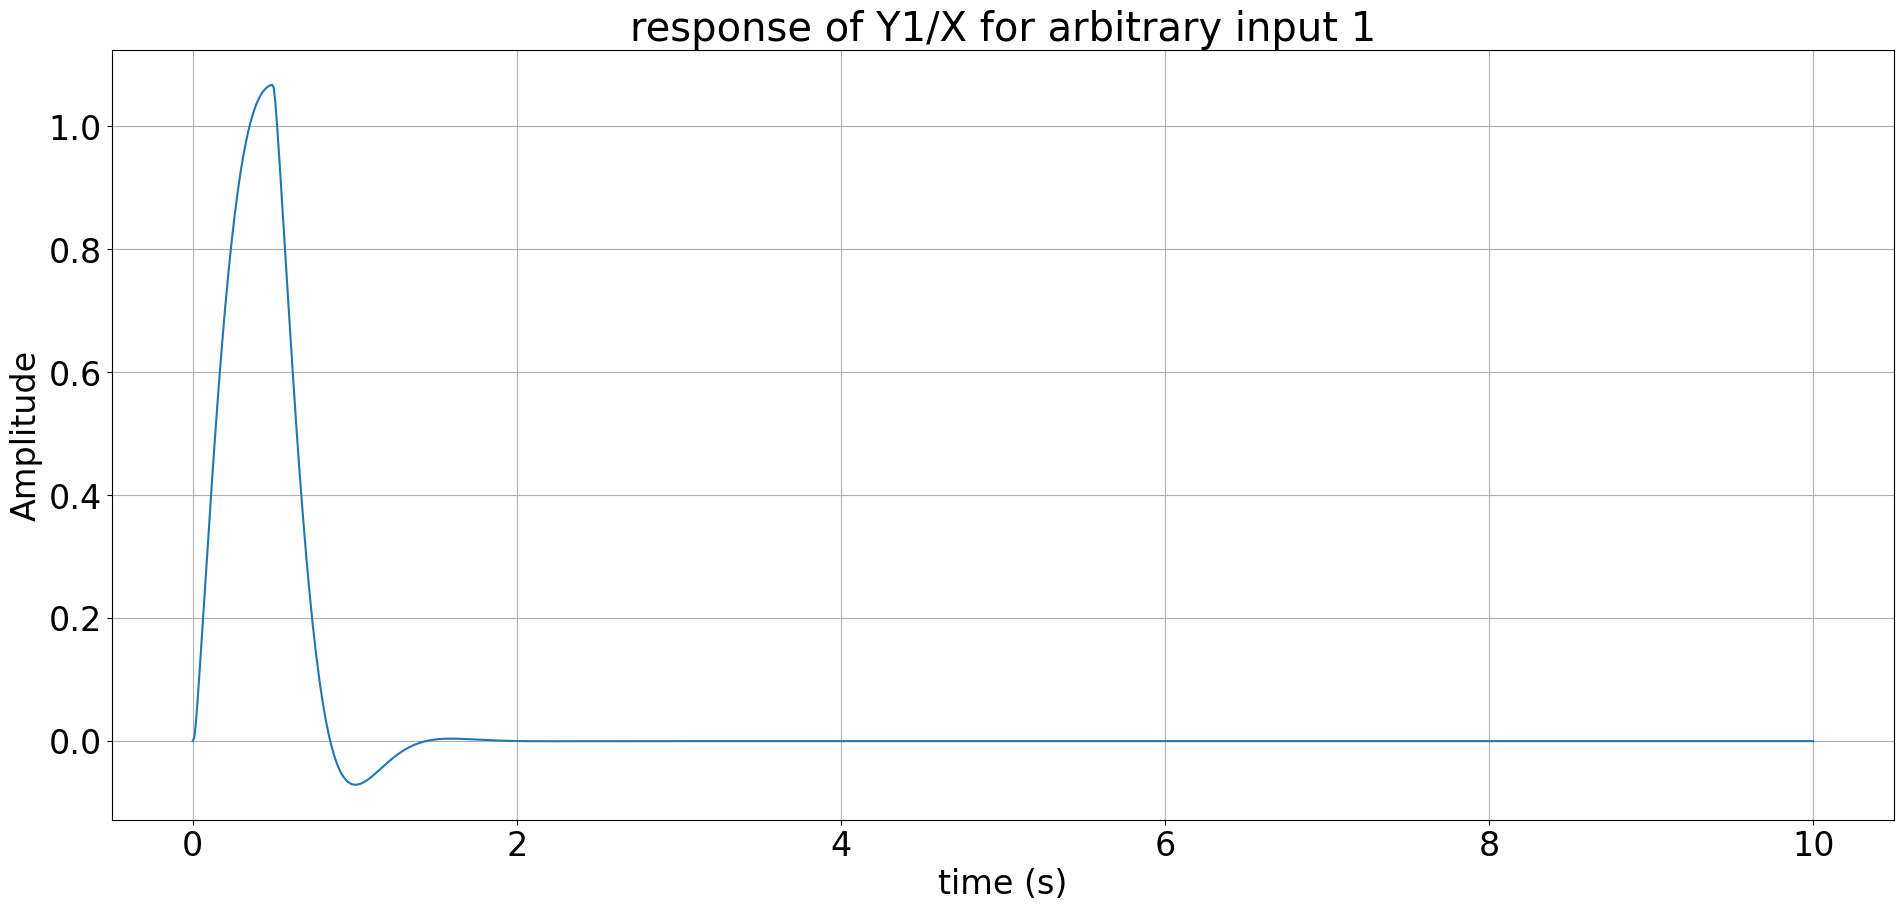

In [ ]:
t1, y1 = co.forced_response(G1,t,t2)

plt.plot(t1, y1)
plt.title('response of Y1/X for arbitrary input 1')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.grid()
# plt.plot(t1, states.T)

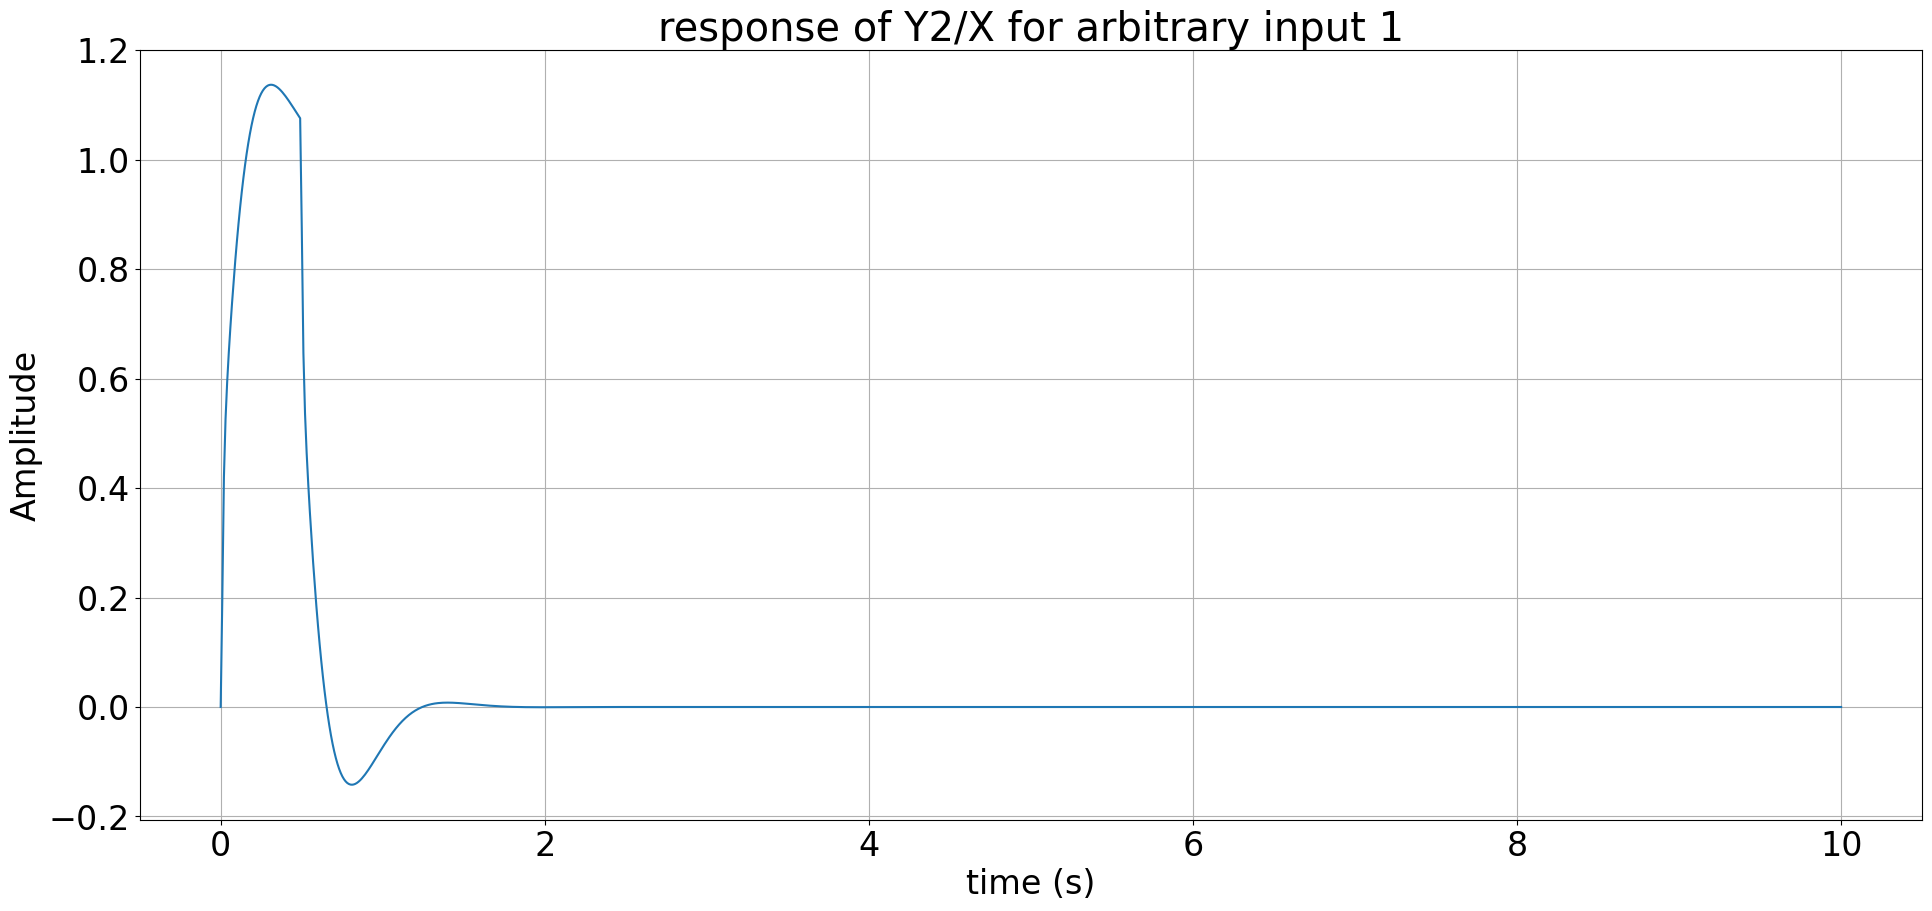

In [ ]:
t1, y2 = co.forced_response(G2,t,t2)

# t1, y1 = co.impulse_response(G1,t)


plt.plot(t1, y2)
plt.title('response of Y2/X for arbitrary input 1')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.grid()
# plt.plot(t1, states.T)

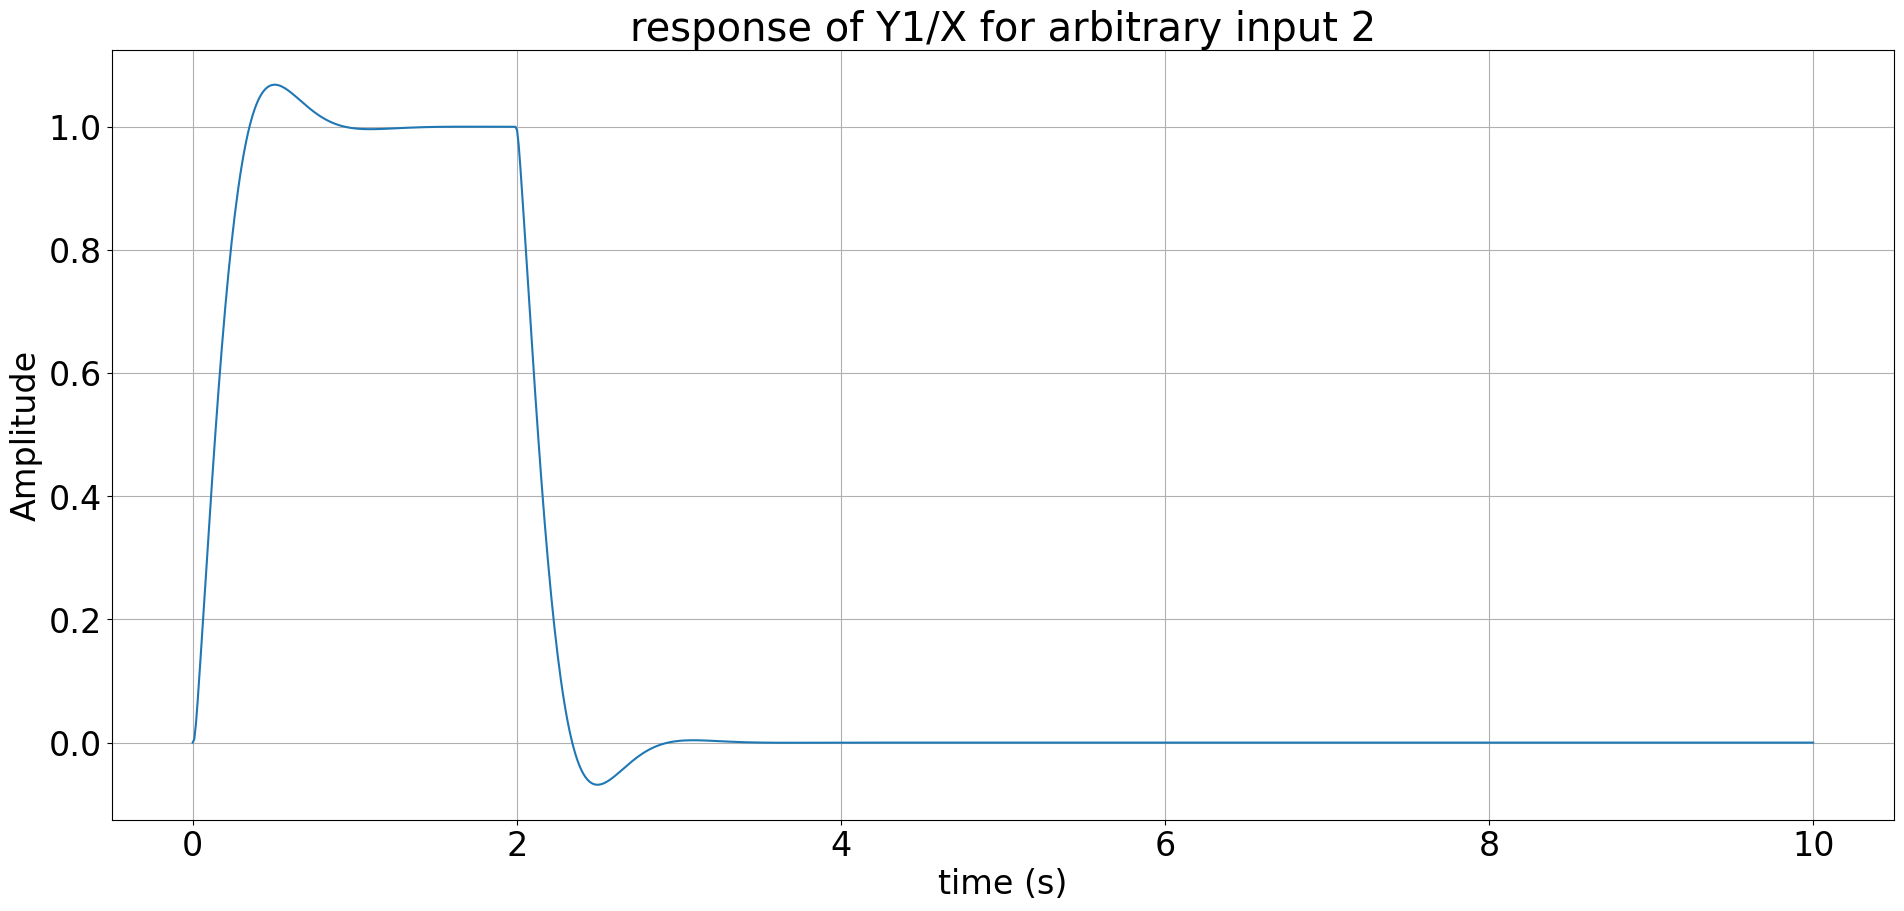

In [ ]:
t1, y1 = co.forced_response(G1,t,t3)

plt.plot(t1, y1)
plt.title('response of Y1/X for arbitrary input 2')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.grid()
# plt.plot(t1, states.T)

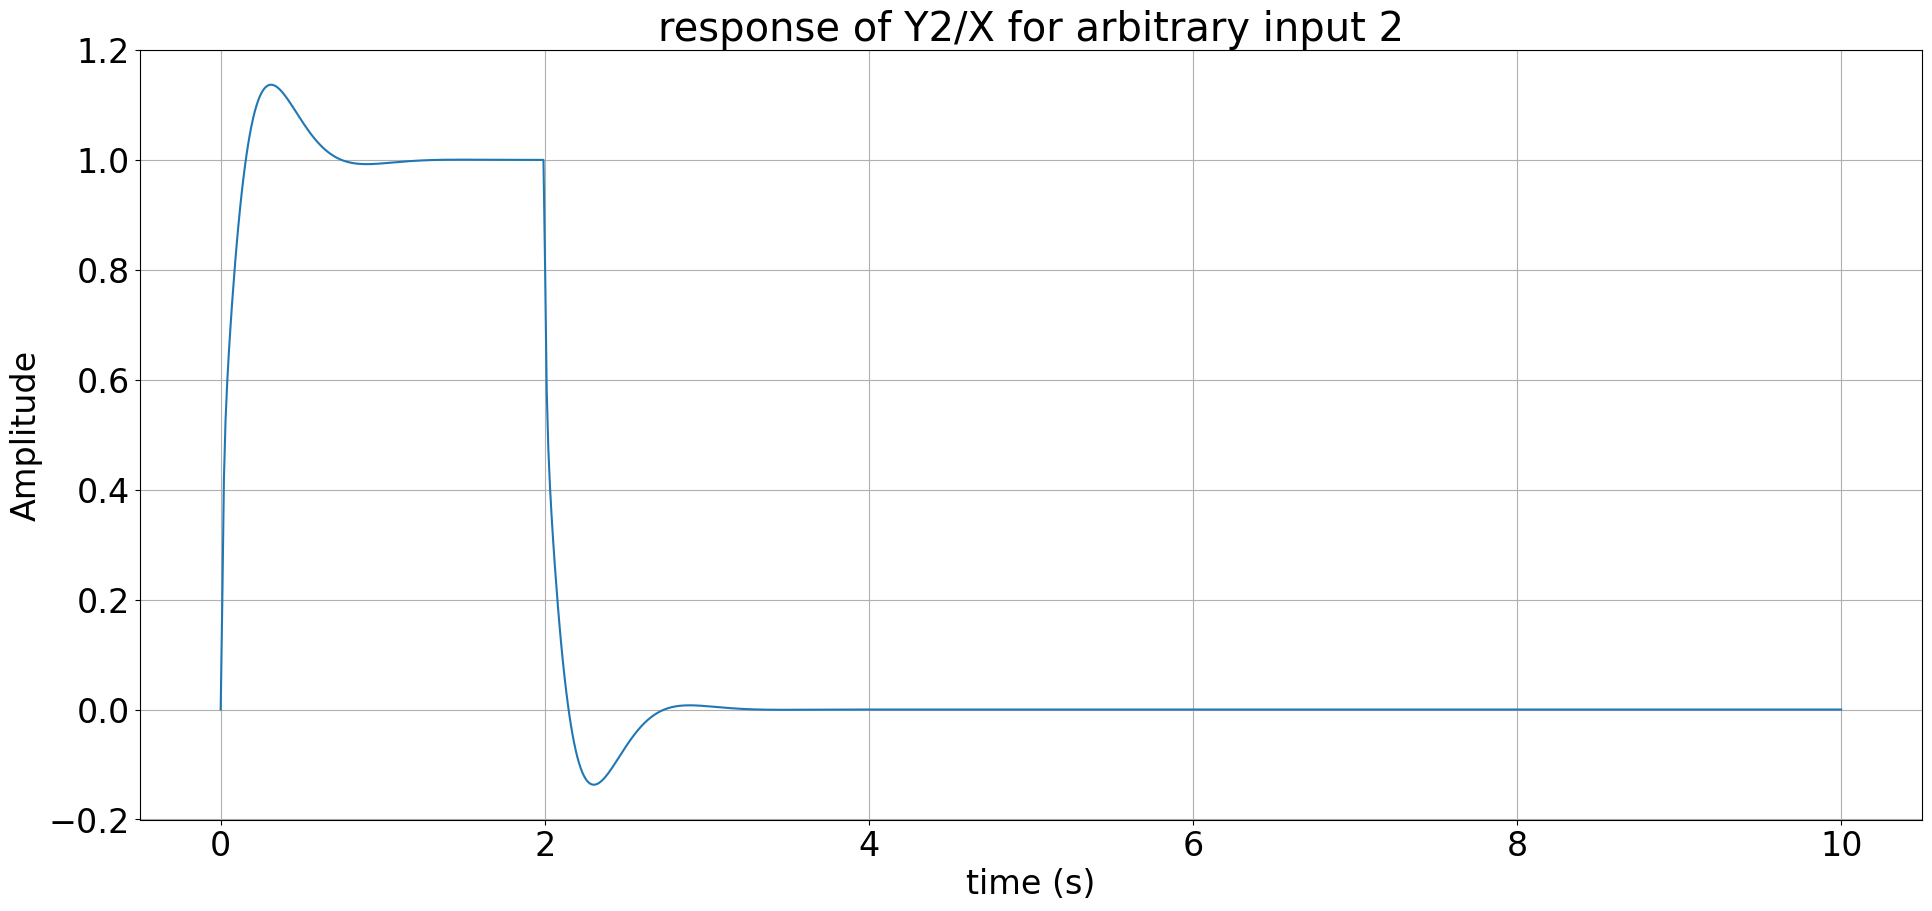

In [ ]:
t1, y1 = co.forced_response(G2,t,t3)

plt.plot(t1, y1)
plt.title('response of Y2/X for arbitrary input 2')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.grid()

# plt.plot(t1, states.T)

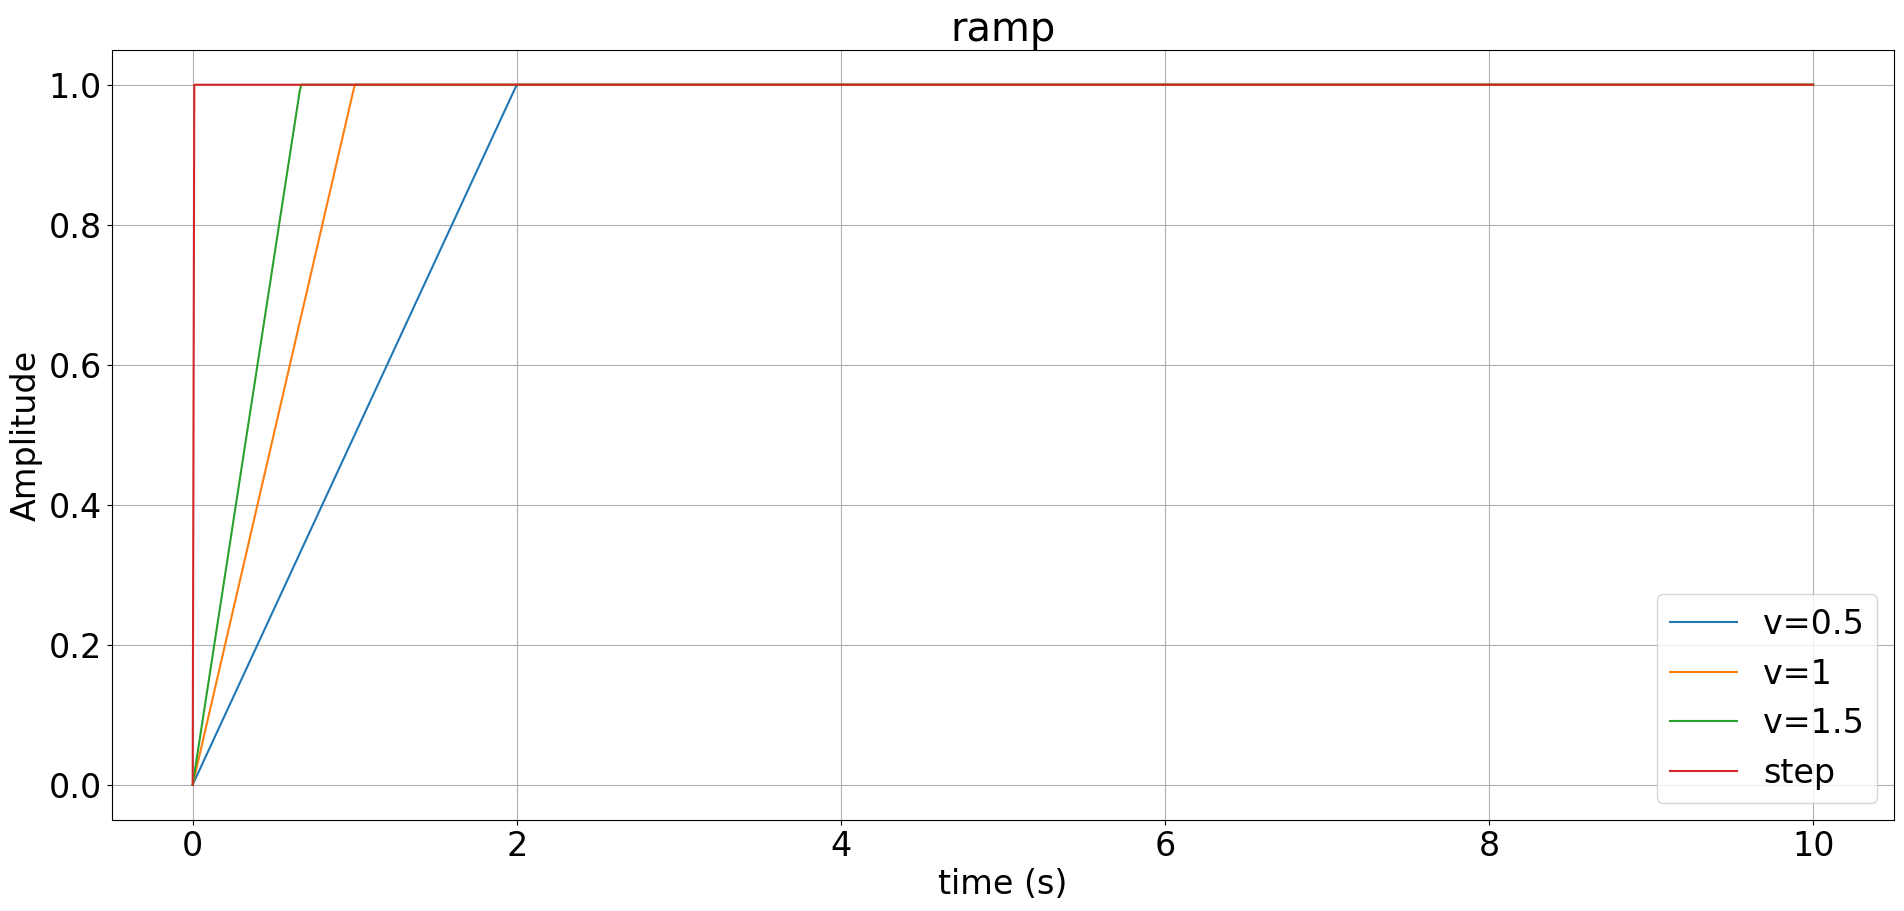

In [ ]:
a1 = 0.5
a2 = 1
a3 = 1.5

f1 = (np.absolute(a1*t-1)-np.absolute(a1*t)-1)/(-2)
f2 = (np.absolute(a2*t-1)-np.absolute(a2*t)-1)/(-2)
f3 = (np.absolute(a3*t-1)-np.absolute(a3*t)-1)/(-2)
plt.plot(t, f1, label='v=0.5')
plt.plot(t, f2, label='v=1')
plt.plot(t, f3, label='v=1.5')
plt.plot(t, u, label='step')
plt.grid()
plt.title('ramp')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.legend()

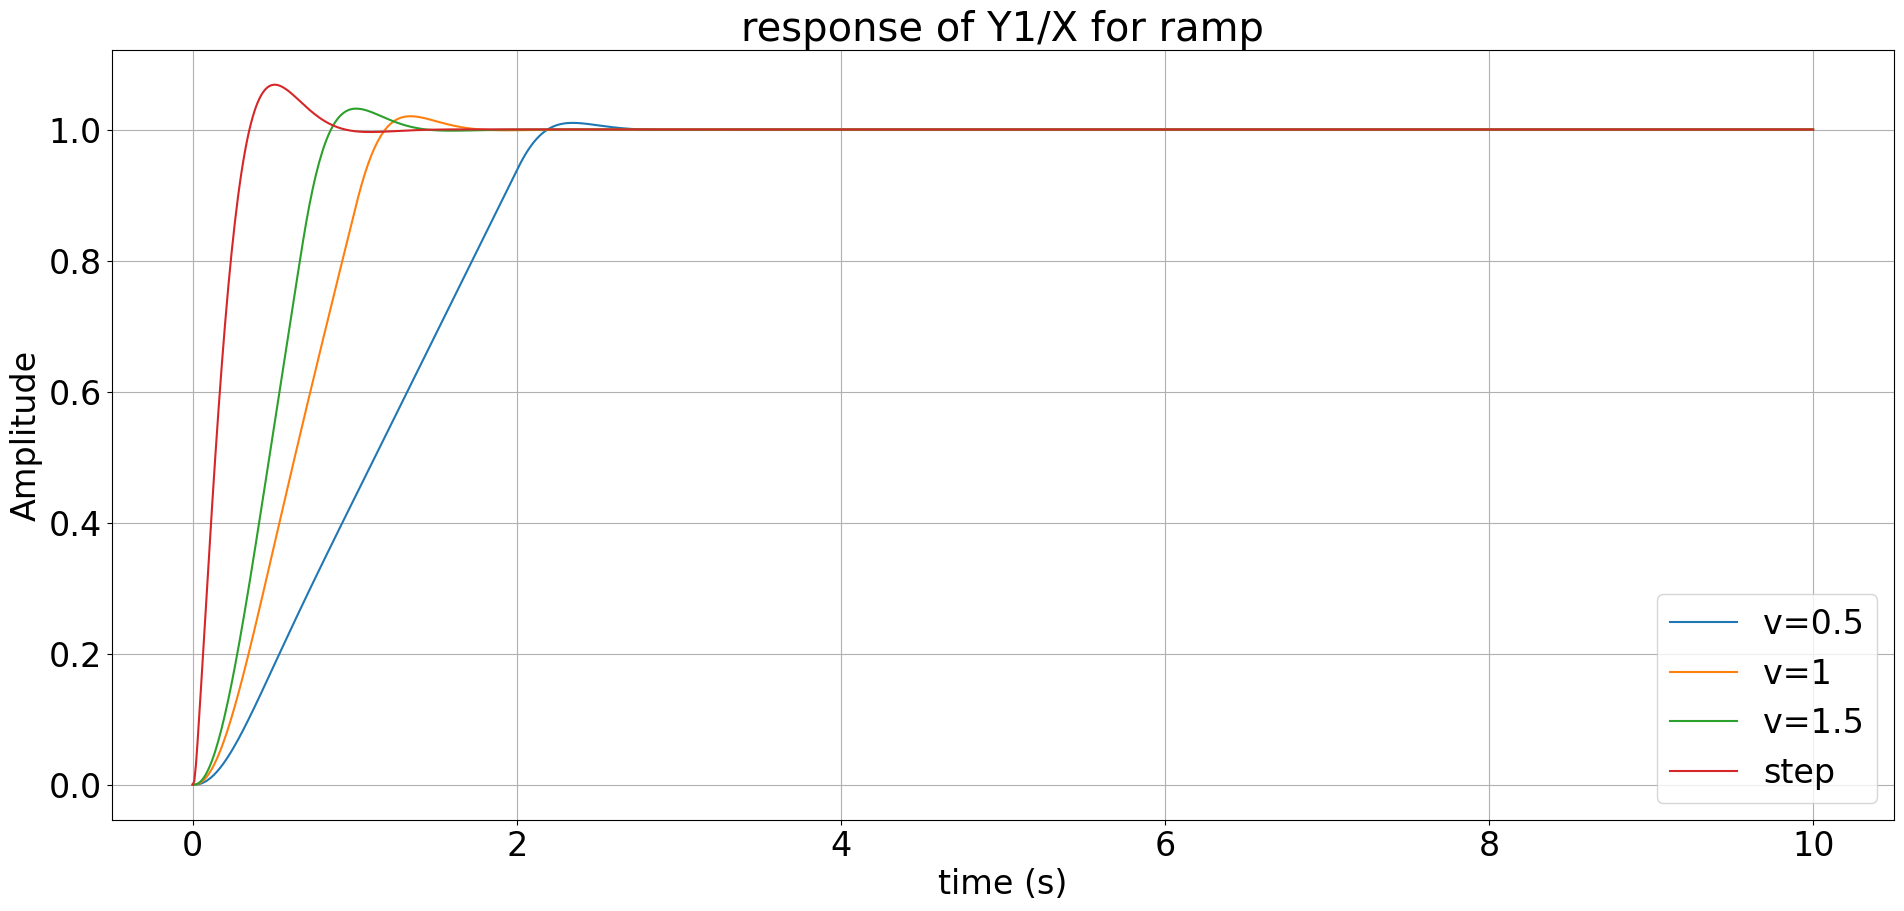

In [ ]:
f1 = (np.absolute(a1*t-1)-np.absolute(a1*t)-1)/(-2)
f2 = (np.absolute(a2*t-1)-np.absolute(a2*t)-1)/(-2)
f3 = (np.absolute(a3*t-1)-np.absolute(a3*t)-1)/(-2)


_, r1 = co.forced_response(G1,t,f1)
_, r2 = co.forced_response(G1,t,f2)
_, r3 = co.forced_response(G1,t,f3)
_, r4 = co.forced_response(G1,t,u)

plt.plot(t, r1, label='v=0.5')
plt.plot(t, r2, label='v=1')
plt.plot(t, r3, label='v=1.5')
plt.plot(t, r4, label='step')
plt.grid()
plt.title('response of Y1/X for ramp')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.legend()

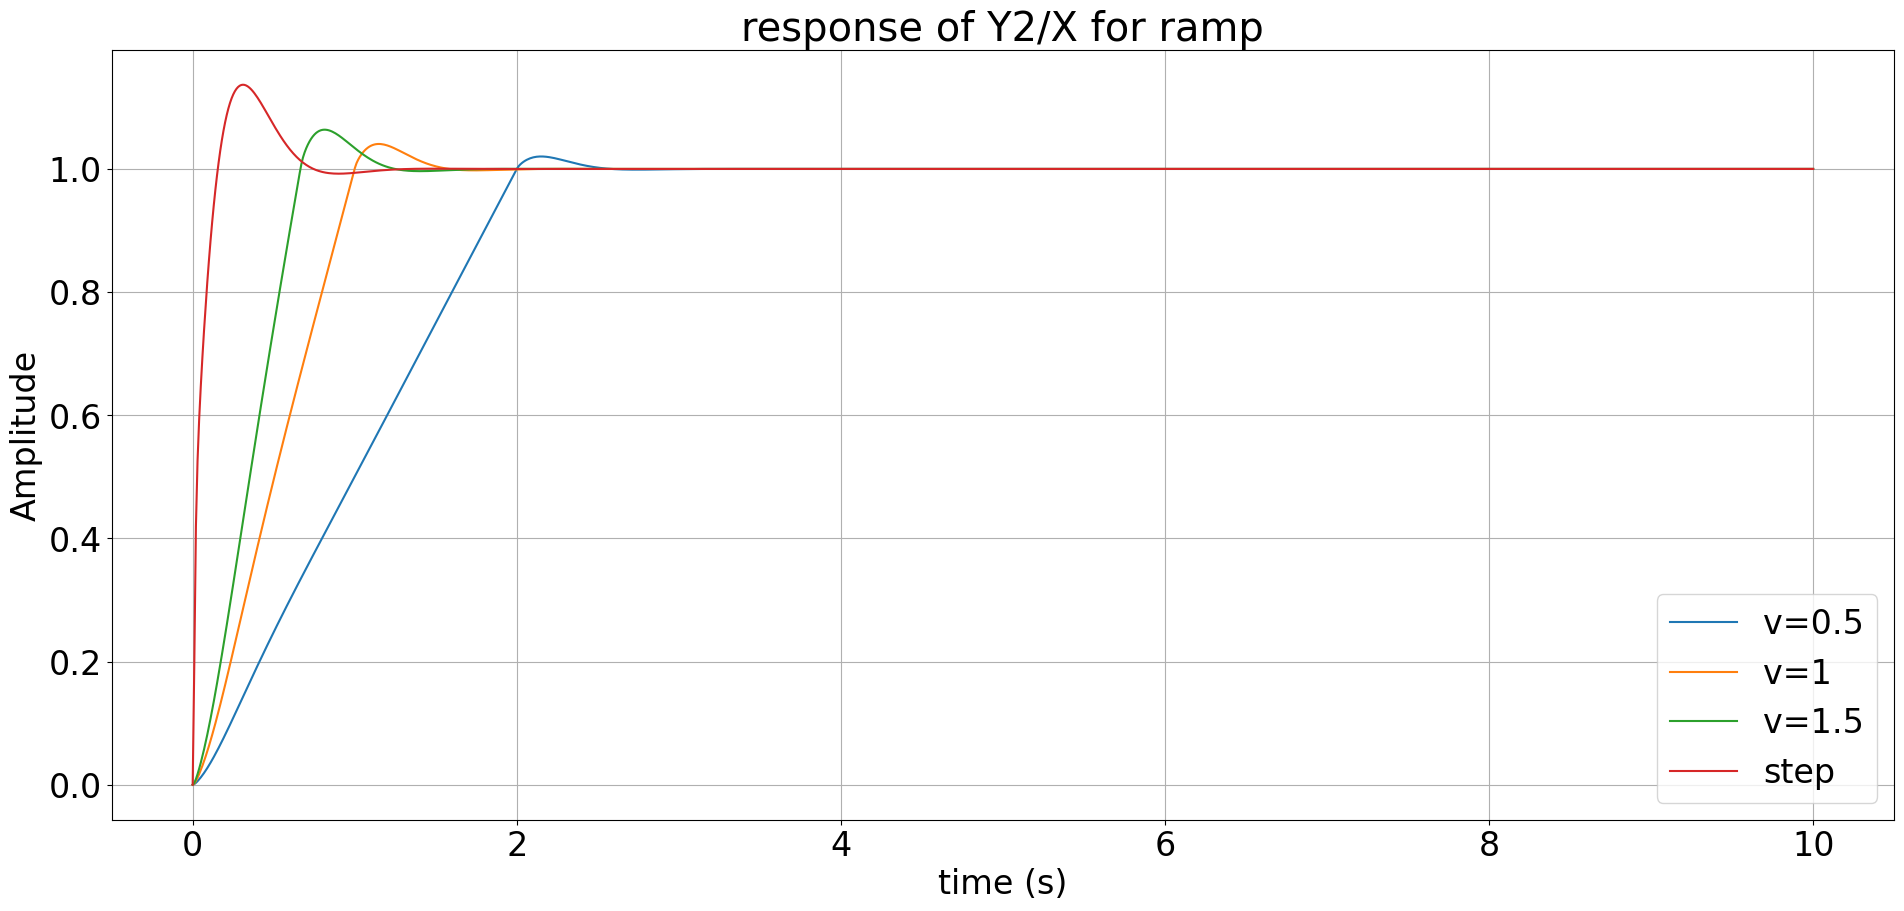

In [ ]:
f1 = (np.absolute(a1*t-1)-np.absolute(a1*t)-1)/(-2)
f2 = (np.absolute(a2*t-1)-np.absolute(a2*t)-1)/(-2)
f3 = (np.absolute(a3*t-1)-np.absolute(a3*t)-1)/(-2)


_, r1 = co.forced_response(G2,t,f1)
_, r2 = co.forced_response(G2,t,f2)
_, r3 = co.forced_response(G2,t,f3)
_, r4 = co.forced_response(G2,t,u)

plt.plot(t, r1, label='v=0.5')
plt.plot(t, r2, label='v=1')
plt.plot(t, r3, label='v=1.5')
plt.plot(t, r4, label='step')
plt.grid()
plt.title('response of Y2/X for ramp')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.legend()